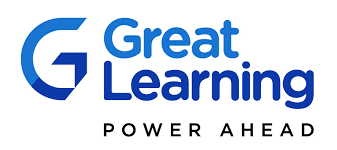

## **GitHub repository URL**
## **https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git**

# **Hands-on Project: Fake News Detection using LSTMs**

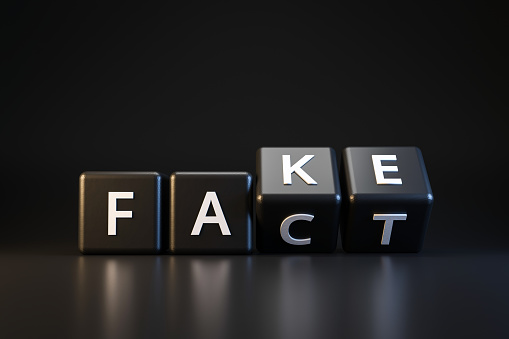

## **Context:**

In today's digital age, we are living in an era where information is available at our fingertips, thanks to social media and the internet. While this may seem like a boon for knowledge seekers, it has also led to the rise of a troubling phenomenon; fake news. **Fake news refers to false information that is deliberately spread to mislead people and shape their opinions.**

The impact of fake news cannot be underestimated. It can spread like wildfire and cause widespread panic and misinformation, leading to undesirable consequences. In recent times, we have seen how fake news has affected the political landscape, with misinformation campaigns and propaganda being used to manipulate public opinion and sway elections.

One of the most significant challenges in combating fake news is its ability to mimic real news. Fake news can be written in a way that appears legitimate, making it difficult for people to identify it as false. This is particularly true in today's era of social media, where the line between reliable sources and questionable sources is often blurred.

Businesses and organizations need to be particularly vigilant about fake news because it can have severe consequences. Decisions based on false information can result in financial losses, damage to reputation, and even legal issues. By detecting fake news, businesses can avoid making critical decisions based on misinformation and prevent potential damage to their bottom line.


## **Problem Statement:**

As a data scientist, you have been hired by a social media manager of a large company to detect instances of fake news that could harm the reputation of their brand. The task requires you to apply your expertise in data science and advanced NLP techniques to develop an effective solution for detecting fake news.


## **Dataset:**

WELFake is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. To prepare this dataset, the authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training. The dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

## **Notebook Content & Flow**

1. [Importing the Libraries](#import)


2. [Reading the Dataset](#read_df)


3. [Merging Columns](#merging_data)
    

4. [Preprocessing the Text Data](#clean_data)
    

5. [Exploratory Data Analysis](#EDA)
    

6. [Preparing the input](#splitting)


7. [Tokenization](#Tokenization)


8. [Building and Evaluating the LSTM Model](#model_building)
    * 8.1 [Define the Model](#defining_model)
    * 8.2 [Compiling the Model](#compiling_model)
    * 8.3 [Plotting the Architecture](#plotting_architecture)
    * 8.4 [Training the Model](#training_model)
    * 8.5 [Plotting the Accuracy](#plotting_accuracy)
    * 8.6 [Evaluating the Model](#evaluating_model)
    * 8.7 [Classification Report](#classification_report)
    * 8.8 [Plotting the Confusion Matrix](#confusion_matrix)
    
    
9. [Conclusions and Learnings](#Conclusions_and_Learnings)

## **GitHub repository URL**
## **https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git**

### **Mounting google drive**

In [1]:
# Connect to google drive from Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='import'></a>

## **1. Importing the Libraries**

### **Q1: Import the necessary libraries and briefly explain the use of each library (5 marks)**

In [2]:
# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd
pd.set_option('max_colwidth', None)

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True) # setting the background of the visualization graph
%matplotlib inline

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

# Used to create the tokens from the text data
from tensorflow.keras.preprocessing.text import Tokenizer

# Importing the TensorFlow library for machine learning.
import tensorflow as tf

from sklearn.model_selection import train_test_split

# Importing the Keras module from TensorFlow.
from tensorflow import keras

# Importing the Input layer from Keras.
from tensorflow.keras.layers import Input

# Importing the Model class from Keras.
from tensorflow.keras import Model

from tensorflow.keras.models import Sequential

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# importing metrics for calculating the scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve

from keras.layers import Dropout

from keras.optimizers import Adam

## **2. Reading the Dataset**

<a id='read_df'></a>
### **Q2: Read the WELFake dataset and print initial information using Pandas (5 marks)**

In [3]:
# Read the dataframe

df = pd.read_csv('/content/drive/My Drive/Artificial Neural Networks/DataSets/WELFake_Dataset.csv',index_col = [0])

In [4]:
# review the shape of the dataframe
df.shape

(72134, 3)

In [5]:
# find information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [6]:
# Read the first 5 rows of the dataframe
df.head(5)

title  \
0         LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                        NaN   
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]   
3                                  Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid   
4                                            SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [7]:
# check the missing values/null in the dataset.
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

<font color='sky blue'>There are about 558 rows with blank title and 39 rows with text blank. It may be a good idea to drop the empty text rows after merging the Title column with the text column</font>

In [8]:
# check the count of each labels
df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

<font color='sky blue'>Based on the count of labels, it looks like an almost balanced dataset. </font>

In [9]:
# find the number of duplicate rows in the dataframe
df.duplicated().sum()

8456

In [10]:
# find unique rows in the dataframe
df.nunique()

title    62347
text     62718
label        2
dtype: int64

In [11]:
# use groupby to find the classes distribution of duplicate rows
groupby_class = df['text'].duplicated().groupby(df["label"])

groupby_class.describe()

,count,unique,top,freq
label,,,,
0,35028,2,False,34620
1,37106,2,False,28099


<font color='sky blue'>From the above code, it is evident that there are about <font color = 'red'>408 duplicates for Class 0 </font>and <font color = 'red'>9007 duplicates for class 1</font>. Deleting the duplicate rows maylead to data skewness of <font color='red'><br>19%</br></font>

## **2.1 Perform data cleaning on the dataframe**

In [12]:
# make a copy of the original dataframe and proceed with the copy

df_new = df.copy()

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71576 non-null  object
 1   text    72095 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [13]:
# review the type in the column "text"
print('Data class in column "text":',df_new['text'].map(type).unique())
# review the type in the column "title"
print('Data class in column "title":',df_new['title'].map(type).unique())

Data class in column "text": [<class 'str'> <class 'float'>]
Data class in column "title": [<class 'str'> <class 'float'>]


<font color ='sky blue'> <b>The 2 columns title and text have a combination of float and string data. This needs to be converted to string for further operations on these columns</b></font>


In [14]:
# # Replace empty strings with Null
df_new = df_new.fillna('')

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   72134 non-null  object
 1   text    72134 non-null  object
 2   label   72134 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [16]:
# Drop Null values
df_new.dropna(inplace = True)

In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63678 entries, 0 to 63677
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   63678 non-null  object
 1   text    63678 non-null  object
 2   label   63678 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [17]:
# review the type in the column "text"
print('Data class in column "text":',df_new['text'].map(type).unique())
# review the type in the column "title"
print('Data class in column "title":',df_new['title'].map(type).unique())

Data class in column "text": [<class 'str'>]
Data class in column "title": [<class 'str'>]


<font color='sky blue'> we observe that the columns have been homogenized to contain the same type of data.

<a id='merging_data'></a>
## **3. Merging the Columns**
### **Q3: Merge the columns - title and text (5 marks)**

In [18]:
# merge the columns title and text into the title column
df_new["text"] = df_new["title"] +" "+ df_new["text"]

In [19]:
# view the resulting dataframe after the merge operation
df_new. head(5)

title  \
0         LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]   
1                                                                                                                                              
2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MOST CHARLOTTE RIOTERS WERE “PEACEFUL” PROTESTERS…In Her Home State Of North Carolina [VIDEO]   
3                                  Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid   
4                                            SATAN 2: Russia unvelis an image of its terrifying new ‘SUPERNUKE’ – Western world takes notice   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [20]:
# find the duplicate rows in the new resulting dataframe
df_new.duplicated().sum()

8456

In [21]:
# dropping the duplicates
df_new = df_new.drop_duplicates(keep = 'first')

# checking for duplicate values
df_new.duplicated().sum()

0

In [22]:
# resetting the index of the dataframe
df_new = df_new.reset_index(drop = True)

In [23]:
# review the resulting dataframe to proceed to the next stage of data cleaning
print('shape of dataframe:',df_new.shape)
print('\n information of the dataframe:',df_new.info())

shape of dataframe: (63678, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63678 entries, 0 to 63677
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   63678 non-null  object
 1   text    63678 non-null  object
 2   label   63678 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB

 information of the dataframe: None


In [24]:
# review the type in the column "text"
print('Data class in column "text":',df_new['text'].map(type).unique())
# review the type in the column "title"
print('Data class in column "title":',df_new['title'].map(type).unique())

Data class in column "text": [<class 'str'>]
Data class in column "title": [<class 'str'>]


<a id='clean_data'></a>

## **4. Preprocessing the Text Data**

### **Q4: Preprocess the values of the text & headline columns (5 marks)**
- Remove unwanted characters
- Convert text to lowercase
- Remove unwanted spaces
- Remove stopwords
- Replace empty strings with Null
- Drop null values from the dataframe
- Delete duplicate rows

In [25]:
# installing contractions for preprocessing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
# function for text pre-processing
def preprocess_text(df):

    # removing punctuations, special characters, numbers but retaining alphabets
    string = re.sub(r'[^a-zA-z\s]', '', df)

    # converting the text to lower
    string = string.lower()

    # removing stop words
    string = ' '.join([word for word in string.split() if word not in stopwords.words('english')])

    # cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string
    #return " ".join(string)

Use the `preprocess_text` function on text column

In [27]:
# applying the preprocessing function to the text column
df_new["text"] = df_new["text"].astype(str)
df_new['clear_text'] = df_new['text'].apply(preprocess_text)

# storing the resulting dataframe in a csv file so that it can be consumed in case of disruption in connection.
df_new.to_csv('/content/drive/My Drive/Artificial Neural Networks/DataSets/fake_news_clean.csv')

In [28]:
df_new[['clear_text', 'label']].head()

clear_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  law enforcement high alert following threats cops whites blacklivesmatter fyf terrorists [video] comment expected barack obama members fyf fukyoflag blacklivesmatter movements called lynching hanging white people cops encouraged others radio show tuesday night turn tide kill white people cops send message killing black people americaone fyoflag organizers called sunshine radio blog show hosted texas called sunshine fing opinion radio show snapshot fyf lolatwhitefear twitter page pm shows urging supporters call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyfthe radio show aired pm eastern standard timeduring show callers clearly call lynching killing white peoplea minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threats result interrupting fyf conference callsan unidentified black man said mother fkers start fing like us bunch niers takin one us roll said cause already roll gangs anyway six seven black mother fckers see white person lynch ass let turn tables conspired cops started losing people state emergency speculated one two things would happen bigass [r s] war niers going start backin already getting killed fk got lose sunshine could heard saying yep true fking true said need turn tables kids getting shot somebody needs become sacrifice sidehe said everybody st whatever like say everybody different position war continued give fk anyway said might well utilized st turn tables ners said way start lookin like havin many casualties causalities side instead killing black people black lives matter mother f

In [29]:
# check information of the resulting clean text column
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63678 entries, 0 to 63677
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       63678 non-null  object
 1   text        63678 non-null  object
 2   label       63678 non-null  int64 
 3   clear_text  63678 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


<a id='EDA'></a>

## **5. Exploratory Data Analysis**

### **Q5: Perform EDA on the data**

### **Q5.1: Create a Word Cloud for the entire `text` column (5 marks)**

There are 35918128 words in the combination of all texts.


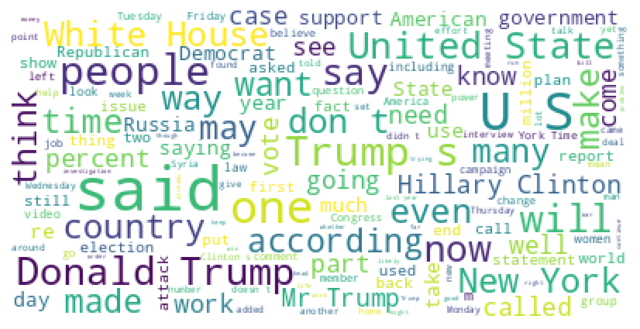

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# plots the top 150 unique words from the orginal text column
all_news = ' '.join(text for text in df_new['text'])
print ("There are {} words in the combination of all texts.".format(len(all_news.split(" "))))

# Lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words = 150, background_color="white").generate(all_news)
plt.figure(figsize = (8,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### **Q5.2: Create separate Word Clouds for Fake News and Real News (5 marks)**

In [31]:
# extract the fake news and real news
fake_news = df_new[df_new['label']== 0]
real_news = df_new[df_new['label']== 1]

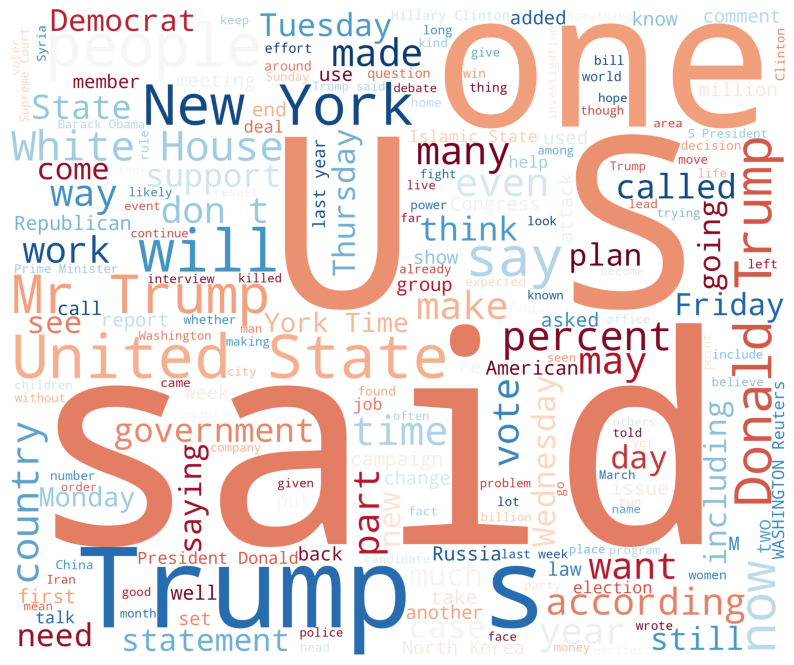

In [32]:
fake_texts = ' '.join(text for text in fake_news['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in fake_texts.split()])

# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

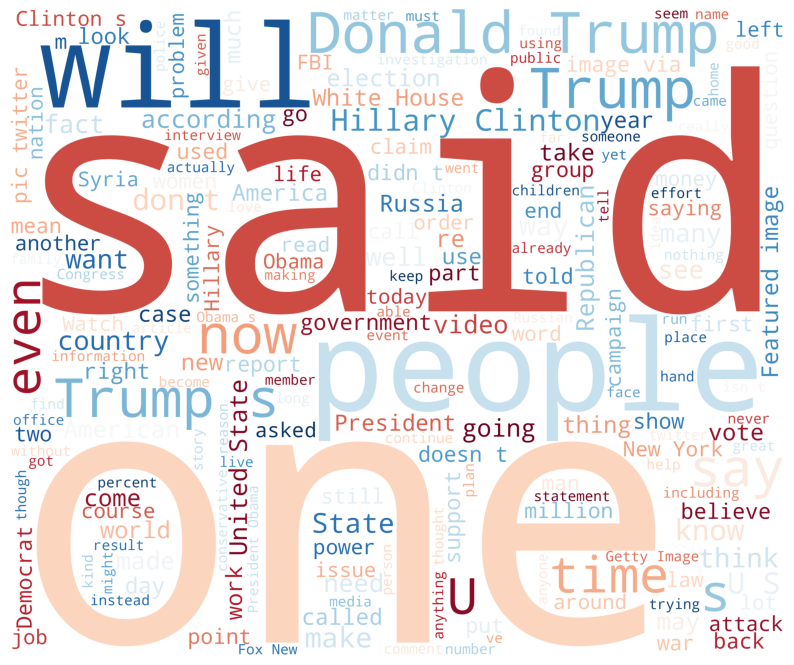

In [33]:
real_texts = ' '.join(text for text in real_news['text'])

# helps to remove the \n characters from the previous output
cleaned_word = " ".join([word for word in real_texts.split()])

# creating the wordcloud using the WordCloud() method
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)

plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Q5.3: Plot the distribution of Fake & Real News (5 marks)**

Text(0.5, 1.0, 'LEGEND:- Fake News: 0, Real News:1')

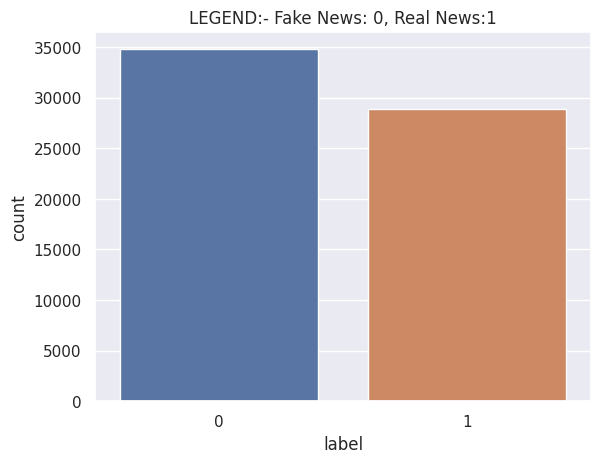

In [34]:
# count plot to view the distribution of fake versus real news
sns.countplot(x=df_new['label'], data=df_new)
plt.title('LEGEND:- Fake News: 0, Real News:1')

### **Q5.4: Plot the distribution of the News Words count (5 marks)**

In [35]:
df_new['num_words'] = df_new['text'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Distribution of the News Words count')

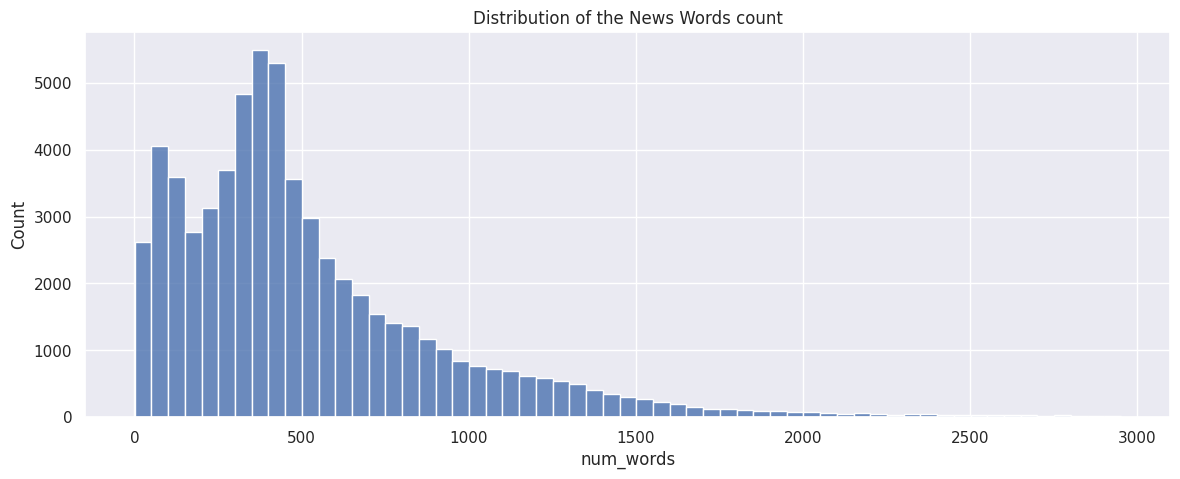

In [36]:
plt.figure(figsize = (14,5))
sns.histplot(df_new['num_words'], bins = range(1, 3000, 50), palette = 'Set1', alpha = 0.8)
plt.title('Distribution of the News Words count')

<a id='splitting'></a>

## **6. Preparing the input (5 marks)**

### **Q6: Splitting the dataset into the training and testing set**

In [37]:
# copying the cleaned data to a new dataset for model building.
df_final = df_new.copy()

In [38]:
X = df_final["clear_text"]
y = df_final["label"]

In [39]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [40]:
print("Shape of Training set : ", X_train.shape)

print("Shape of test set : ", X_test.shape)

print("Percentage of classes in training set:")

print(y_train.value_counts(normalize = True))

print("Percentage of classes in test set:")

print(y_test.value_counts(normalize = True))

Shape of Training set :  (44574,)
Shape of test set :  (19104,)
Percentage of classes in training set:
0    0.5446
1    0.4554
Name: label, dtype: float64
Percentage of classes in test set:
0    0.550461
1    0.449539
Name: label, dtype: float64


<a id='Tokenization'></a>

## **7. Tokenization (5 marks)**

### **Q7: Perform the below mentioned operations:**
- Define a Tokenizer
- Fit the Tokenizer on training data
- Tokenize the sentences using the trained tokenizer object
- Print the size of the vocabulary

In [41]:
# Define Keras Tokenizer
tok = Tokenizer()
tok.fit_on_texts(X_train)

# return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)

# print size of the vocabulary
print(f'Vocabulary of Training data: {len(tok.word_index)}')

Vocabulary of Training data: 269020


### **Pad sequences to fixed length**

In [42]:
# maximum sequence length (512 to prevent memory issues and speed up computation)
MAX_LEN = 512

# padded sequences
X_train_seq = pad_sequences(sequences, maxlen=MAX_LEN)
X_test_seq = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [43]:
# shape of the first element
X_train_seq.shape[1]

512

In [44]:
# the input sequense has been convered to an mxn array
X_train_seq

array([[    0,     0,     0, ..., 14947,  6337,     6],
       [  448,   223,  1214, ...,    46,   492,   298],
       [    0,     0,     0, ..., 16453,  2616,   694],
       ...,
       [    0,     0,     0, ...,   236, 23061,  2480],
       [    0,     0,     0, ...,   395,  1507,  5807],
       [    0,     0,     0, ...,  2068,    47,   306]], dtype=int32)

<a id='model_building'></a>

## **8. Building and Evaluating the LSTM Model to Predict Fake News**

### **Q8: Define and compile the LSTM model, get predictions, and evaluate the output.**

<a id='defining_model'></a>

### **Q8.1: Perform the below mentioned operations: (5 marks)**
- Define a sequential model
- Add an Embedding layer
- Add a Dropout layer
- Add an LSTM layer
- Add a Dropout layer
- Add a Dense layer
- Print model summary

In [45]:
# Creating model Using LSTM

embedding_vector_features=40

# initializing the constructor
model= Sequential()
#Embedding layer
model.add(Embedding(len(tok.word_index), embedding_vector_features, input_length=X_train_seq.shape[1]))
# Dropout layer
model.add(SpatialDropout1D(0.2))
# LSTM layer
model.add(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2))
# Dropout layer
model.add(Dropout(0.2))
# Dense layer
model.add(Dense(2, activation = 'softmax'))

# print the summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 40)           10760800  
                                                                 
 spatial_dropout1d (SpatialD  (None, 512, 40)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 150)               114600    
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense (Dense)               (None, 2)                 302       
                                                                 
Total params: 10,875,702
Trainable params: 10,875,702
Non-trainable params: 0
____________________________________________

<a id='compiling_model'></a>

### **Q8.2: Compile the model (5 marks)**
- Use loss as `binary_crossentropy`
- Use optimizer as `adam`
- Use metrics as `accuracy`

In [46]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<a id='plotting_architecture'></a>

### **Q8.3: Plot the model architecture (5 marks)**
- Plot model architecture using plot_model function

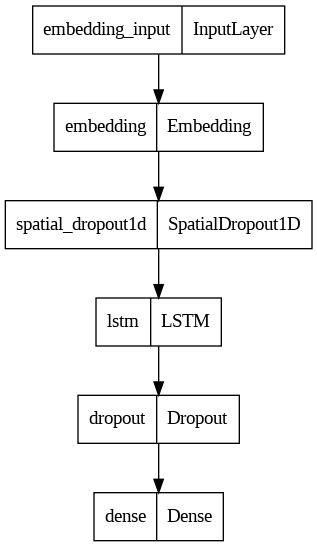

In [47]:
# plot the model architecture
tf.keras.utils.plot_model(model)

<a id='training_model'></a>

### **Q8.4: Training the model (10 marks)**
- Use a validation split of 20% during the training
- Epochs: 10 minimum
- Define batch size
- Use callbacks

In [48]:
# convert the labels to categorical variables
y_test = pd.get_dummies(y_test)

y_train = pd.get_dummies(y_train)

In [49]:
# print the shape of the resulting variables
print(y_train.shape)

print(X_train_seq.shape)

(44574, 2)
(44574, 512)


In [52]:
# stop training if the validation loss has reached minimum
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
mcp_save = ModelCheckpoint('.mdl_wts.h5', save_best_only=True, monitor='loss', mode='min')

In [54]:
history = model.fit(X_train_seq, y_train, epochs=10,
                    validation_split = 0.2, batch_size = 64,callbacks=[es,mcp_save], verbose = 1 )

Epoch 1/10
558/558 [==============================] - 960s 2s/step - loss: 0.2536 - accuracy: 0.8949 - val_loss: 0.1567 - val_accuracy: 0.9481
Epoch 2/10
558/558 [==============================] - 916s 2s/step - loss: 0.1088 - accuracy: 0.9640 - val_loss: 0.1745 - val_accuracy: 0.9372
Epoch 3/10
558/558 [==============================] - 896s 2s/step - loss: 0.0791 - accuracy: 0.9726 - val_loss: 0.1813 - val_accuracy: 0.9383
Epoch 4/10
558/558 [==============================] - 890s 2s/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.1872 - val_accuracy: 0.9435
Epoch 5/10
558/558 [==============================] - 885s 2s/step - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.2394 - val_accuracy: 0.9363
Epoch 6/10
558/558 [==============================] - 882s 2s/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.2587 - val_accuracy: 0.9291
Epoch 7/10
558/558 [==============================] - 881s 2s/step - loss: 0.0131 - accuracy: 0.9957 - val_loss: 0.2446 - val_accuracy: 0.9456

<a id='plotting_accuracy'></a>

### **Q8.5: Plot the Train/Validation Loss and Accuracy (5 marks)**

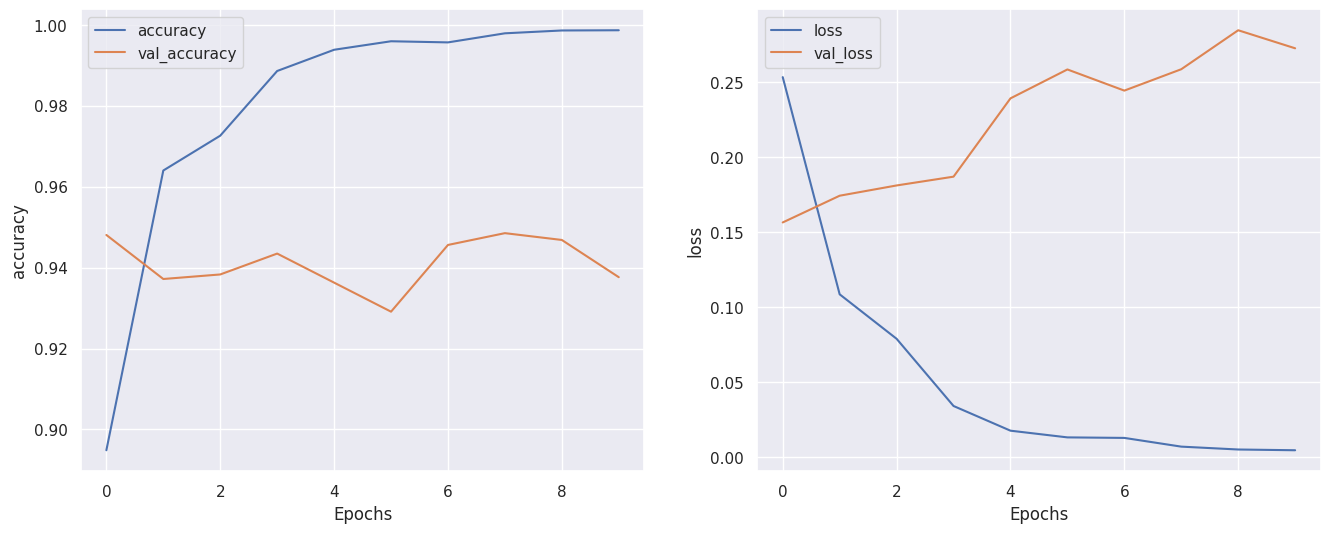

In [55]:
# plot the train/validation loss and accuracy
def plot_graphs(history, metric):

    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])


plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

<a id='evaluating_model'></a>

### **Q8.6: Evaluate the model (5 marks)**
- For final evaluation we use the separate test set

In [56]:
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = model.predict(X_test_seq)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

597/597 [==============================] - 83s 138ms/step
Test Loss: 0.2789837718009949
Test Accuracy: 0.9384945631027222


<a id='classification_report'></a>

### **Q8.7: Print the classification report (5 marks)**

In [57]:
# print classification report
print(classification_report(y_test, np.where(y_hat >= 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10516
           1       0.95      0.91      0.93      8588

   micro avg       0.94      0.94      0.94     19104
   macro avg       0.94      0.94      0.94     19104
weighted avg       0.94      0.94      0.94     19104
 samples avg       0.94      0.94      0.94     19104



<a id='confusion_matrix'></a>

### **Q8.8: Plot the confusion matrix (5 marks)**

In [68]:
# reversing the one hot encoding.
label_test= y_test.idxmax(axis=1)
label_predict = np.argmax(y_hat, axis=1)

Text(41.25, 0.5, 'Real Labels')

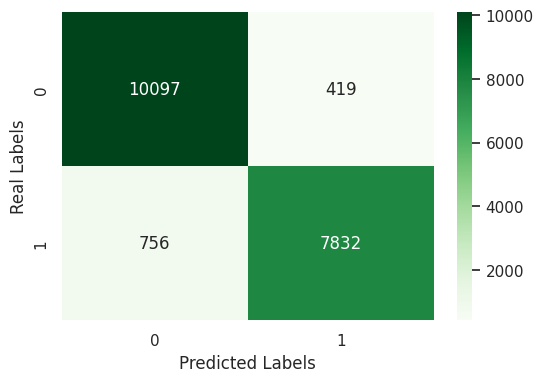

In [74]:
#plot the confusion matrix
plt.figure(figsize = (6,4))

sns.heatmap(confusion_matrix(label_test, label_predict), annot=True,
            fmt='', cmap='Greens')

plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<a id='Conclusions_and_Learnings'></a>

##  **9. Conclusions and Learnings**

### **Q9: Add your Conclusions and Learnings from this project (5 marks)**

<font color='sky blue'>

1.   From the model run, it can be infered that the model tends to overfit with the training data, however from the validation set, it is heading towards more generalization.
2.   The loss function with the training set is trending towards minimum after 8 epochs however, the validation loss tends to increase with each epoch.
1.   Accuracy, Precision, Recall, f1-score all average out to be 94%. Making it a pretty strong and generalized model
2.   The model does a great job of predicting both the classes with a slight better performance at predicting the real news class.
1.   It can be concluded that LSTM is a RNN for text processing. It is far superior that other statistical or probabilitic methods
2.   More LSTM layers and additional epochs can be added to try and increase the accuracy of the model.
1.   Hypertuning of parameters should be consider to further improve the model metrics.
2.   Text preprocessing is as important for LSTM models as it is for other simpler models and a considerable effort must be invested for preprocessing of text.
1.   Dropping the duplicate rows in the data, resulted in the skewness of 19% amongst the class distribution, however, it didn't impact the prediction capability of the model.









